In [1]:
!cd

In [2]:
!pwd

/Users/yoohwayoung/[K-Digital]TIL/0616


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
tips = pd.read_csv('../[K-Digital]Training_up0616/Python/pandas/tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [5]:
#tips = pd.read_csv('./tips.csv')

<AxesSubplot:xlabel='day', ylabel='count'>

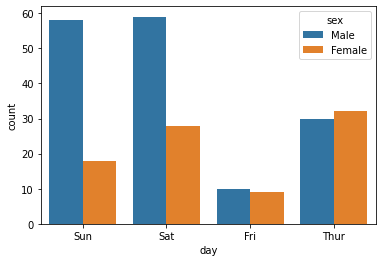

In [12]:
sns.countplot(x='day', hue='sex', data=tips, order=['Sun', 'Sat', 'Fri', 'Thur'])

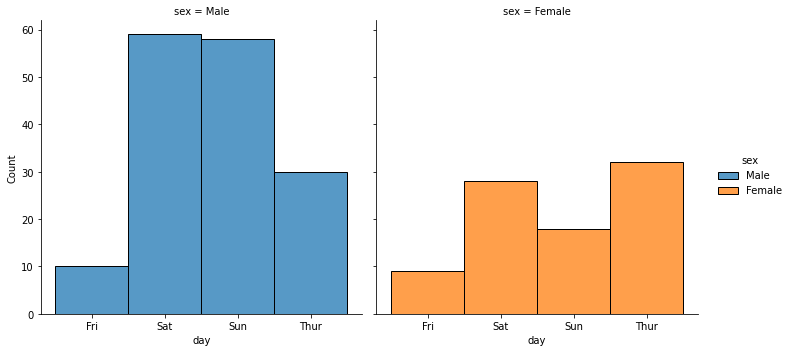

In [10]:
# tips=tips.sort_values(by=['day'])
sns.displot(x='day', hue='sex', data=tips,col='sex')

In [ ]:
tips=tips.sort_values(by=['day'], axis=0, ascending=True)
sns.displot(x='time', hue='sex', data=tips,col='sex')

In [ ]:
tips.groupby(tips['day']).count() #d요일이 제일 많은 sun, sat이 예측이 어렵다.

In [ ]:
tips.groupby([tips['day'],tips['time']]).count()

In [ ]:
tips.groupby([tips['sex'],tips['day']]).count()

In [ ]:
tip_sex=tips.groupby([tips['tip'],tips['sex']]).count()

In [ ]:
total_bill_mean = tips.groupby(["size"]).agg({"total_bill": [np.mean]})
total_bill_mean

In [ ]:
sns.countplot(x = 'size', hue = 'sex', data = tips )

plt.show()

In [ ]:
tips=tips.sort_values(by=['day'], axis=0)
sns.displot(x='day', hue='sex', data=tips, col='sex')

In [ ]:
sns.displot(x='tip', hue='sex', data=tips, col='sex')

In [ ]:
tip_sex.tail(10)

In [ ]:
sns.catplot(x="sex", y="total_bill",
                  hue="time", col="time",
                  data=tips, kind="box")

In [ ]:
tip_sex.describe()

In [ ]:
tips.groupby([tips['sex'],tips['time']]).count()

In [ ]:
tips.groupby([tips['sex'],tips['time']]).count()

In [ ]:
tips.head()

In [ ]:
tips.total_bill.hist()

In [ ]:
t_bill=tips.total_bill

In [ ]:
plt.boxplot(t_bill, labels=['Total_bill'])
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
t_sns_bill=sns.boxplot(x='total_bill', data=tips)
t_sns_bill

In [ ]:
t_tips =tips.tip

In [ ]:
plt.boxplot(t_tips, labels=['tip'])
plt.show()  #t_bill보다 분산값이 더 크다. 

In [ ]:
t_tips.describe()

In [ ]:
sns.regplot(data=tips, x='size', y="tip") #hue는 구분할 수 있는 클래스

계산서가 많으면 많이 먹는 선형회귀가 보인다. <br/>
3-4명일때 아웃라이어가 크게 보인다. <br/>
5-6일땐 안보인다.<br/> 
**5명이상오면 자녀와 올 확률이 많아서 팁을 많이 뿌리지 않을 거라는 인사이트를 얻는다.<br/>
3-4명일땐 친구들과 함께 올 수 있는 확률이 높아서 팁을 많이 준다는 인사이트를 얻는다.**

In [ ]:
sns.histplot(x=t_bill, bins=50)

In [ ]:
sns.distplot(x=t_bill, bins=50)

In [ ]:
tips.info()

In [ ]:
size = pd.crosstab(index=tips['size'], columns='count') 
#1명의 방문횟수, 2명의 방문횟수, 3명의 방문횟수,... 6명의 방문 횟수  

In [ ]:
size

In [ ]:
pd.crosstab(index=tips['size'], columns='count')

In [ ]:
size.plot.bar()

In [ ]:
size_tip = pd.crosstab(index=tips['size'], columns=tips['tip']) 

In [ ]:
size_tip # 금액의 빈도수 

In [ ]:
size_t_bill=size_tip = pd.crosstab(index=tips['size'], columns=tips['total_bill']) 

In [ ]:
size_t_bill

In [ ]:
tip_rate=tips["tip"]/tips["total_bill"] #tip_rate 변수를 내가 하나 더 만든 것임 

In [ ]:
tips['tip_rate']=(tips['tip']/tips['total_bill'])

In [ ]:
tips['tip_rate']

In [ ]:
tips.describe()

In [ ]:
import pandas_profiling

In [ ]:
tips.head(3)

In [ ]:
tips.corr()

### profile_report 결과 해석
비싸게 먹을수록 tip이 적어진다.
2명씩 오는 것이 tip 비율이 높다.
레스토랑 입장에선 단체보단 소수가 오는 것이 tip 비율이 더 높아 이득이다. 

-------
상관관계는 예를 들어서 가설을 세운다. 
- 주가가 급등을 하니까 비싼차가 잘 팔려요. (양의 상관관계)


In [ ]:
tips['sex']=tips['sex'].replace({'Female':0, 'Male':1}) #범주형데이터를 인코딩하는 과정

In [ ]:
tips['sex'].unique

In [ ]:
tips['smoker']=tips['smoker'].replace({'No':0, 'Yes':1}) #범주형데이터를 인코딩하는 과정

In [ ]:
tips['day'].unique()

In [ ]:
tips['day']=tips['day'].replace({'Thur':0, 'Fri':1, 'Sat':2, 'Sun':3})  #범주형데이터를 인코딩하는 과정

In [ ]:
tips['time']=tips['time'].replace({'Lunch':0, 'Dinner':1}) #범주형데이터를 인코딩하는 과정

In [ ]:
tips.day.count()

In [ ]:
top_tip = (tips['tip_rate']> 0.7)

In [ ]:
sns.pairplot(tips)   #복사하기

In [ ]:
tips.corr()

In [ ]:
tips.profile_report() #만든 tip_rate의 상관관계를 보기 위함

In [ ]:
tips.assign(tip_rate=tips["tip"] / tips["total_bill"]).head(5)

In [ ]:
tips[tips["time"] == "Dinner"].head(5)

In [ ]:
week=tips.groupby('day').agg({'tip':np.mean, 'day':np.size})

In [ ]:
week

In [ ]:
week.tip

In [ ]:
week.tip.max()

In [ ]:
week.tip.mean()

In [ ]:
week.iloc[0,:]

In [ ]:
week.loc['Fri','tip']

In [ ]:
smoker0=tips.groupby(["smoker", "day"]).agg({"tip": [np.size, np.mean]})

In [ ]:
smoker0

In [ ]:
smoker0.iloc[1, :]

In [ ]:
smoker0.iloc[7,:]